In [1]:
# import the basic library functions which you want to play

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns 
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('iris (1).csv')# read the file
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# performing the basic EDA functions 

In [4]:
label=preprocessing.LabelEncoder()#inorder to convert the Species column into the numeric we are using the label encoder 
data['Species']=label.fit_transform(data.Species)
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


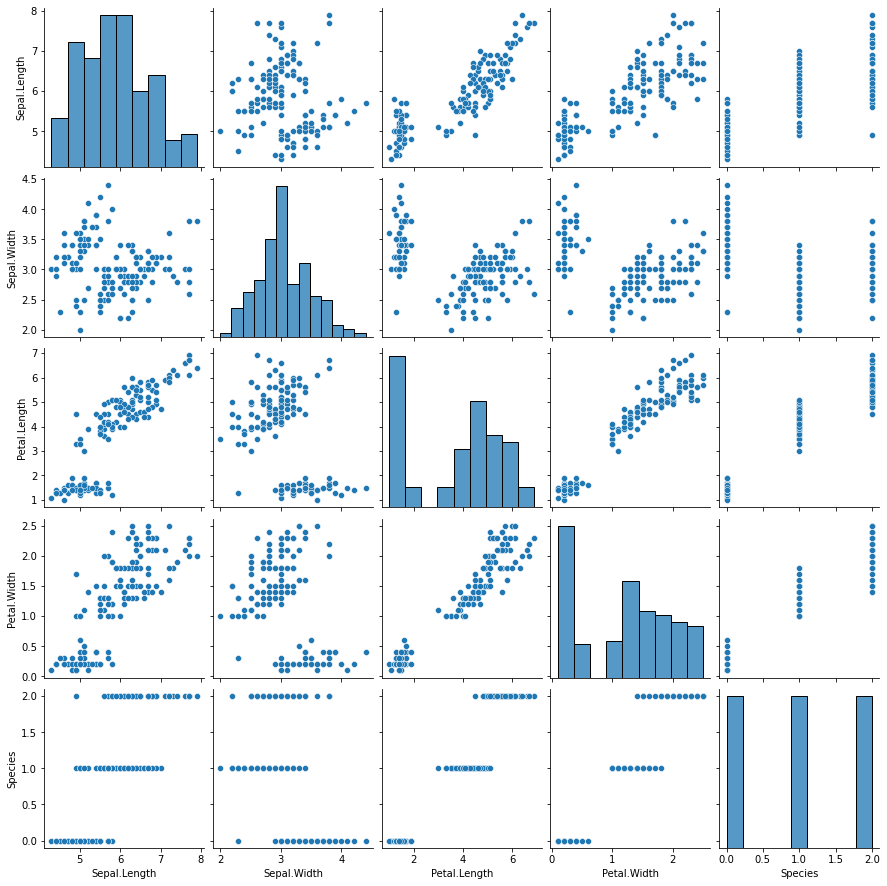

In [12]:
sns.pairplot(data)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

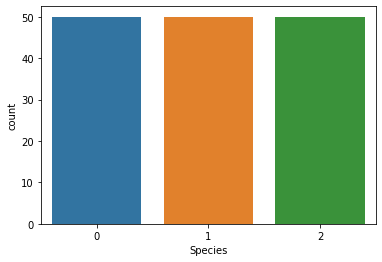

In [13]:
sns.countplot(data.Species)

In [8]:
x=data.iloc[:,0:4]
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y=data.iloc[:,-1] # here i am assigning the dependent variable to the y
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [10]:
kfold=KFold(n_splits=10,random_state=7)# selecting the no of kfolds i want in my data set

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


# developing the model of Random Forest 

In [14]:
model=RandomForestClassifier(n_estimators=100,max_features=2)
model.fit(x,y)

RandomForestClassifier(max_features=2)

In [16]:
imp_feature=model.feature_importances_
imp_feature

array([0.10221194, 0.02812259, 0.45198115, 0.41768432])

In [17]:
iv=['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

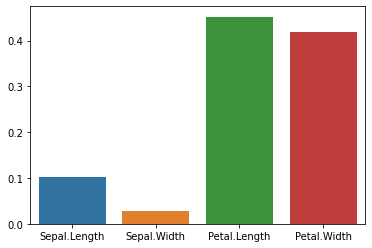

In [18]:
sns.barplot(iv,imp_feature)

In [19]:
accuracy=cross_val_score(model,x,y,cv=kfold)
accuracy

array([1.        , 1.        , 1.        , 1.        , 0.93333333,
       0.86666667, 1.        , 0.86666667, 0.8       , 1.        ])

In [20]:
accuracy.mean()

0.9466666666666667

(array([1., 0., 0., 2., 0., 0., 1., 0., 0., 6.]),
 array([0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 10 artists>)

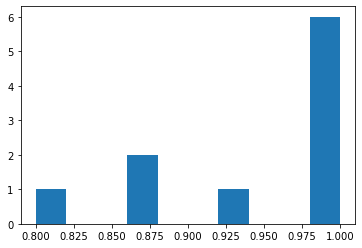

In [21]:
plt.hist(accuracy)